In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from plots import *

sp.init_printing()
freqs = [f for f in np.random.standard_cauchy(11) if abs(f) < 10]
omega = [2+ f for f in freqs] + [1 - f for f in freqs] + [1]

from BondGraphTools import version
import BondGraphTools as bgt
assert version == "0.3.7"
scale = 2

from matplotlib.font_manager import FontProperties

def plot_graph(t, x):
    fontP = FontProperties()
    fontP.set_size('small')
    fig = plt.figure(figsize=(scale*4,scale*4))
    plt.plot(t,x)
    ax = fig.gca()
    ax.set_xlabel('t')
    ax.set_title(f"System response to {impulse}")
    ax.legend(
        [f"$x_{i}$" for i in range(len(x))],
        bbox_to_anchor=(1.,1.),
        loc=1,
        borderaxespad=0.,
        prop=fontP
    )
    return fig

def print_tree(bond_graph, pre=""):
    print(f"{pre}{bond_graph}")
    try:
        for component in reversed(bond_graph.components):
            if pre == "": print_tree(component, pre +"|-" )
            else: print_tree(component, pre +"-" )
    except AttributeError:
        pass

TODO:
2. Add critical values for Kuramoto model.
3. Add critical values for Nonlinear oscillator model.

- Introduction to complex systems
- Basic research question

Lit Points:
- Emergence is low dimension dynamics in high dimensional space. (Should be a geometric description; but we're not there yet.)
- Collective motion requires tradeoffs between coulping strength and population heterogeneity. (Framed in terms of some kind of averaging)



# On Emergence in Complex Physical Systems


https://github.com/peter-cudmore

&nbsp;

    Dr. Peter Cudmore.  
    Systems Biology Labratory,   
    The School of Chemical and Biomedical Engineering,  
    The University of Melbourne.  

Many problems in biology, physics and engineering involve predicting and controlling complex systems, loosely defined as interconnected system-of-systems. Such systems can exhibit a variety of interesting non-equilibrium features such as emergence and phase transitions, which result from mutual interactions between nonlinear subsystems. 

Modelling these systems is a task in-and-of itself, as systems can span many physical domains and evolve on multiple time scales. Nonetheless, one wishes to analyse the geometry of these models and relate both qualitative and quantitative insights back to the physical system.

Beginning with the modelling and analysis of a coupled optomechanical systems, this talk presents some recent results concerning the existence and stability of emergent oscillations. This forms the basis for a discussion of new directions in symbolic computational techniques for complex physical systems as a means to discuss emergence more generally.


## The problem with big systems is that they're _big_...

## Example: Many-body Quantum Optomechanics

<center><img src="images/spins.png" width=800px alt="Quantum Many-Body systems"></center>

(Image courtesy of Knap, M. https://users.ph.tum.de/ga32pex/ )

<center><img src="images/research2016arrays.jpg" width=600px>
</center>

(Image courtesy of Marquardt, F.
https://photons-and-matter.org/research/ )

## Example: Human Metabolism

<center><img src="images/map.png" height=600px></center>

(Image courtesy of Human Metabolism map https://www.vmh.life )

# Example: Ecosystems

<center><img src="images/water_cycle.jpg" width=800px></center>

## Complex Physical Systems 

A dynamical system is said to be a _complex physical system_ when:
* It is made up of many _interacting_ parts, or subsystems (High-dimensional).
* The subsystems are not all of the same (Heterogenenous).
* The subsystems are complicated (Nonlinear and/or Noisy).
* There are well defined boundaries between the subsystems (Network Topology).
* **Coupling takes place via resource exchange (Conservation Laws).**

## Complex Systems can exhibit _emergence_.

- _Emergence_ is a phenomenom where the system displays novel new behaviour that could not be produced by individuals alone.
- _Synchronisation_ is the most studied example of emergence, and can occur in systems of coupled oscillator.

<center><b><i> How can one predict and control emergent phenomenon?</i></b></center>

<center><b><i>
How can nonlinear dynamics be "scaled up"?   
</i></b></center>

## Outline of this talk


![The Goal](images/Sydney.svg)

In this talk we will:

Briefly discuss synchronisation as it's the best example of emergence.

Discuss how we might generalise this for energetic systems.

## Part 1: Synchronised Oscillators

## The Kuramoto Model

_Self-entrainment of a population of coupled non-linear oscillators_ Kuramoto, Y. (1975).

The phase $\theta_j$ of each oscillator with a natural frequency $\omega_j$ is given by

\begin{equation}
\dot{\theta}_j =  \omega_j + \frac{K}{n}\sum_{k=1}^n\sin(\theta_k - \theta_j),\qquad j=1,\ldots n
\end{equation}
- When $0\le K <K_c $ each oscillator rotates at their own frequency.

- A Hopf bifurcation occurs at $K=K_c$ creating collective motion.

- When $K>K_c$ more oscillator are recruited to collective.

The value of $K_c$ depends upon the distribution of $\{\omega_j\}$. For symmetric distribtuions we have
$$K_c = \frac{2}{\pi g(0)}$$


<IPython.core.display.Javascript object>


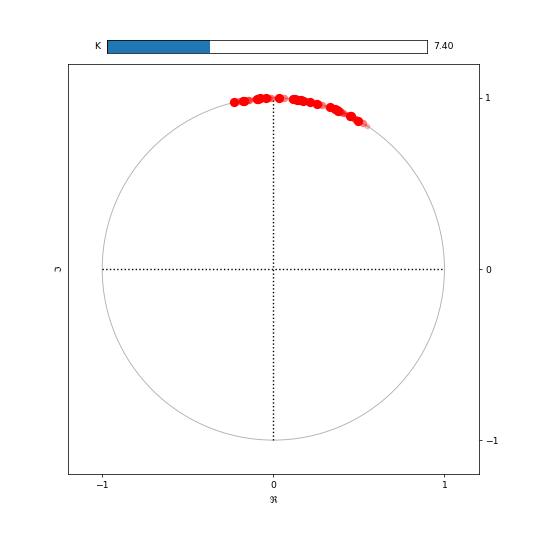

In [3]:
# Omega = Cauchy(2,1) so that K_c = 2
p = KuramotoModel(omega=omega, scale=scale)
plt.show()

Points:
- Wiener -> Winfree -> Kuramoto
- Comes from studying BZ reaction
- Motion on a strongly attracive limit cycle (invariant manifold) such that coupling
- All-to-all coupling on a complete graph.
- sinusoidal in phase -> linear in complex co-ordinates.
- Kuramoto showed that at $K_c=2$ a Hopf bifurcation creates a synchronised state, that becomes progressive more stable as $K_c$ increases.

## The Kuramoto Model (Cont.)

Kuramoto introduced an 'order parameter' $r$ to measure phase coherence
\begin{equation}
z = r\mathrm{e}^{\mathrm{i}\Theta} = \frac{1}{n}\sum_{k=1}^n \exp{\mathrm{i}\theta_k} \implies r = \frac{1}{n}\sum_{k=1}^n \exp\mathrm{i}(\theta_k-\Theta)
\end{equation}
It follows that
$$
\Im\left[\frac{1}{n}\sum_{k=1}^n\exp i(\theta_k - \theta_j)\right] = 
\Im\left[r\exp i(\Theta - \theta_j)\right] 
$$


Hence
$$
\dot{\theta}_j =  \omega_j + \frac{K}{n}\sum_{k=1}^n\sin(\theta_k - \theta_j)$$

becomes 
$$
\dot{\theta}_j =  \omega_j + rK\sin(\Theta - \theta_j).
$$

<IPython.core.display.Javascript object>


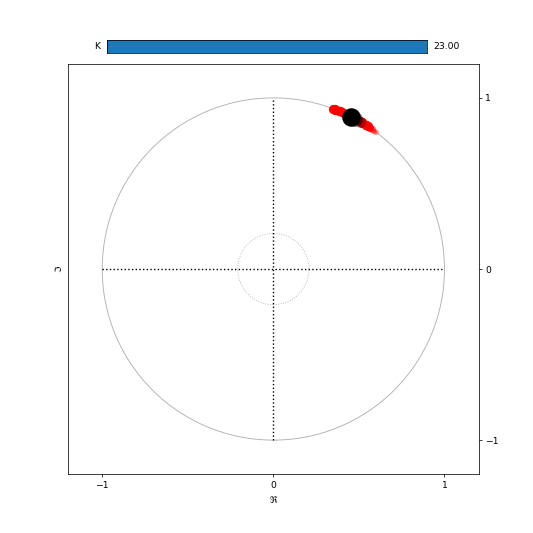

In [4]:
p = KuramotoOrderModel(omega,scale=scale)
plt.show()

Points:
- Mean phase is a kind of coordinate for the synchronous manifold.
- Weak interactions with entire populations <=> strong coupling to collective statistics
- Feedback look means that if coupling increases coherence, then $r$ increases asymptotically to $r_\infty = \sqrt{1-K_c/K}$$.

## The Status of the Kuramoto Model 

$$
\dot{\theta}_j =  \omega_j + rK\sin(\Theta - \theta_j),\qquad j = 1,\ldots n.\qquad r = \frac{1}{n}\sum_{k=1}^n \exp i (\theta_k - \Theta).
$$

- Identical oscillators evolve on a 3 dimensional manifold (Watanabe and Strogatz, Physica D 1994. Ott and Antonsen, Chaos 2008).
- Heterogenous oscillator dynamics represented in terms of collective co-ordinates in the thermodynamic limit (Pikovsky and Rosenblum, Physica D, 2011) and for finite-n (Gottwald, Chaos 2015).
- Active research into applications in biology (particuarly neuroscience), physics and chemsitry.
- Extensions to noisy, graph coupled and with various different coupling mechanisms.
- Very few global results for heterogenous oscillators (Dietert, J. Math. Pures Appl. 2016).
- _No results as yet for geometrical interpretation of transtion to synchrony._

## Some Takeaways

$$
\dot{\theta}_j =  \omega_j + rK\sin(\Theta - \theta_j),\qquad j = 1,\ldots n.\qquad r = \frac{1}{n}\sum_{k=1}^n \exp i (\theta_k - \Theta).
$$


1. When thinking about emergence, we want to think about mutual coupling between population statistics and individuals.

2. This means that, for a given system, we need to understand both the individual dynamics _and_ population level dynamics.

# Part 2: Coupled Optomechanical Systems 

## Physics of Many-Body Quantum Optomechanics

![Optomechanial experiment](images/experiment.svg)

The Quantum Hamiltonain for the system is  
$$
H = H_\text{cavity}+H_\text{drive}+H_\text{beams}
+H_\text{coupling} + \mathcal{H}_\text{diss}
$$
where
$$
\begin{align}
H_\text{cavity} =&\ \frac{\omega_c}{2} a^\dagger a\\
H_\text{drive} =&\ u^\dagger a + a^\dagger u\\
H_\text{beams} =&\ \sum_j \frac{\omega_j}{2}b_j^\dagger b\\
H_\text{coupling} =&\ \sum_j \frac{G}{4}
(b_j+b^\dagger_j)a^\dagger a\\
\end{align}
$$
where $a^\dagger,a ,b_j^\dagger,b_j,u^\dagger,u$ are the creation and annihilaton operators of the 
optical mode, vibrational modes and optical forcing respectively.

Also:
- $\omega_c$ is the resonant frequency of the optical cavity
- $\omega_j$ is the mechanical resonance of the $j$th beam
- $G$ is the strengh of opto-mechanical coupling
- $\mathcal{H}_\text{diss}$ is the 'dissipative structure'...

## From Quantum Physics to Semiclassical Dynamics

![Optomechanial experiment](images/experiment.svg)

1. Derive/produce the (generalised) Langevin equations.
2. Use the semiclassical approximation to replace operators with averages, so that $a \rightarrow \alpha$ and $a^\dagger \rightarrow \alpha^*$
3. Assume the optical forcing is $\left<u\right> = \nu\exp[i\omega_ft]$ and define $\delta =\omega_c - \omega_f$
4. Perform some rescaling and non-dimensionlisation to get 
$$
\begin{align}
\dot{\alpha}&= - (1+i\delta)\alpha - i\alpha \frac{1}{n}\sum_{j=1}^n\Re \left[\beta_j\right] -i\nu \\
\dot{\beta_j} +  i\bar{\omega}\beta_j &= -\gamma \left[(1+i\omega'_j)\beta_j + i\frac{G}{2}|\alpha|^2\right], \quad j=1,\ldots, n
\end{align}
$$
where $\gamma \ll1$ and $\omega_j = \bar{\omega} + \gamma\omega_j'$
5. Apply the 'method of multiple scales' with $\tau = \gamma t$ to get $\beta(t,
\tau) = z(\tau)\exp[-i\bar{\omega}t]$.
6. Notice that $\Re[\beta] = \cos(\omega t +\phi)$ makes $\alpha$ look like a F.M oscillator, so has a basis in terms of Bessel functions.
7. More algebra...

<center><b><i>...how much of this can be automated?</i></b></center>

## On the other side

![Optomechanial experiment](images/experiment.svg)

&nbsp;
The fast time system (for the cavity $\alpha$):

$$
\frac{d\alpha}{dt} = 
-\alpha  - i(\delta + r(\tau)\cos[\bar{\omega}t + \Theta(\tau)])\alpha - i\nu
$$


&nbsp;
The slow time system (coupling induced frequency shift $z_j$):

$$
\frac{d z_j}{d\tau} 
= -(1- i\omega'_j)z_j + zF(|z|), \qquad z = re^{i\Theta} = \frac{1}{n}\sum_{j=1}^n z_j
$$

With $F:[0,\infty) \rightarrow \mathbb{C}$ a complicated but known and computable function.

## Collective motion on the slow time scale

**Theorem (PC & Holmes. 2015)**  
Define the _dispersion function_
$$
f(\mu) = \int_{-\infty}^\infty \frac{g(\omega)d\omega}{\mu - i\omega}.
$$

(1) For sufficiently large $n$, the system
$$\dot{z}_j
= -(1- i\omega_j)z_j + zF(|z|), \qquad z = \frac{1}{n}\sum_{j=1}^n z_j$$
has coherent motion on (possibly many multi-stable) invariant manifold(s) characterised by 
$$
z = re^{i\Theta},\quad \dot{r} = 0, \qquad \dot{\Theta} = \Omega
$$
and 
$$r\left[F(r) - \frac{1}{f(1+i\Omega)}\right] = 0.$$

(2) For symmetric $g$ solutions are strictly unsable iff   

$$
\left\langle\frac{dF}{dr},\frac{d}{d\mu}\frac{1}{f(\mu)}\bigg|_{1+i\Omega}\right\rangle >0,
$$  
where $\langle x,y\rangle = \Re[xy^*]$ is the geometric inner product for $x,y\in \mathbb{C}$. 

<IPython.core.display.Javascript object>


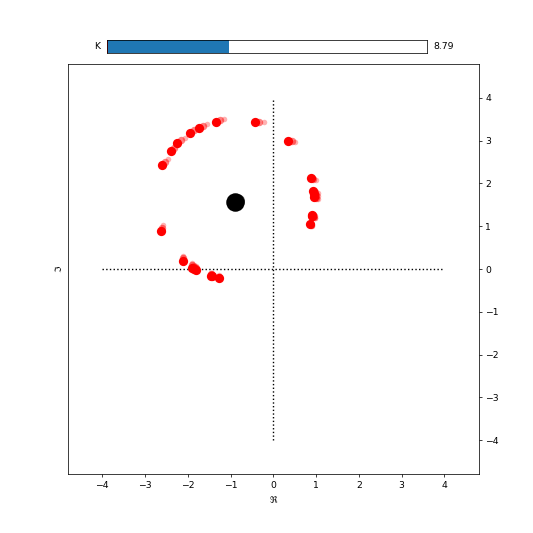

In [5]:
# F(r) = K/(1+r^2) is stable iff K > 2
m = DampedCoupledOsc(omega=omega, extent=4, scale=scale)
plt.show()

Notes:
- Only collective motion: S^1.
- Multistability which can be created and destroyed via Hopf's.
- Results for general coupling function $F$.
- Proof involves treating $1/f(\mu)$ as a conformal map from the RHP.

## Synch corresponds to frequency modulation on the fast time scale

![Optomechanial experiment](images/experiment.svg)

On the fast time scale:

$$\frac{d\alpha}{dt} = 
-\alpha  - i(\delta + r(\tau)\cos[\bar{\omega}t + \Omega\tau])\alpha - i\nu
$$

If we can measure $(r,\Omega)$, we can determine the internal state.

Here $\alpha$ falls well into the realm of existing signal processing theory (in particular frequency modulation). Hence, we can associate spectral properties to internal state.

(The maths is hideous though)

## Some Observations

![Optomechanial experiment](images/experiment.svg)

&nbsp;  

&nbsp;  

&nbsp;  


# Object Oriented Modelling for Complex Physical Systems 

&nbsp;

### Inheritance, Composition and Encapsulation

## Ad-hoc modelling.

![Optomechanial experiment](images/experiment.svg)

1. Use descriptions of physical processes plus network topology to generate some odes.
2. Do a whole bunch of algebra.
3. Work out the appropriate coordinates to use based on geometric features (here, a non-standard slow fast system)
4. More algebra to reduce model.
5. Investigate the dynamics of the reduced models.
6. Relate results in reduced model to observables in the original system

In the case of emergent phenomenon, the 'reduced' subspace involves the whole (or at least a large part of) system. E.g. mean fields.

## Ad-hoc approaches won't scale.

<center> <img src="images/map.png"> </center>

As an example:
- individual processes are far more heterogenous
- network topolgy is complicated
- many parameters are unknown
- almost guaranteed to be a differential-algebraic system
- **too big for one person, or even one lab**

We must have:
- Ways to respresent and manipulate such systems,
- Ways to manage congnitive complexity,
- Ways to automate model capture and reduction,
- Ways to effective share work between researchers

## Energy provides an interface.

![Optomechanial experiment](images/experiment.svg)

![Cavity_network](images/cavity_network-01.svg)

## The Structure of Complex Physical Systems

An approach based on 'bond graph' modelling, and port-Hamiltonian systems.

- Energy is stored in 'state variables' $q,p$
- Power is distributed via 'power variables' $e,f$
- Formally describes the hyrdo-mechanical-electrical analogies.

For example; 
- Dissipation relates $e,f$ variables. (eg. Ohm's law, friction, etc)
- Potential storage $q$ to $e$ (eg, capacitors, gravity) 

<table>
<tr>
    <th>Domain</th>
    <th>$q$</th>
    <th> $f = \dot{q}$</th> 
    <th> $p$ </th>
    <th>$e = \dot{p}$</th>    
</tr>
<tr>
    <td> Translational Mechanics </td>
    <td> position </td>
    <td> velocity </td>
    <td> momentum </td>
    <td> force </td>
</tr>
<tr>
    <td>
Rotational Mechanics </td>
    <td> angle </td>
    <td> angular velocity </td>
    <td> angular momentum </td>
    <td> torque
    </td>
</tr>
<tr><td>
Electronics</td>
    <td> charge  </td>
    <td> current </td>
    <td> flux linkage</td>
    <td> voltage</td>
</tr>
<tr><td>
Hydraulics</td>
    <td> volume </td>
    <td> flow </td>
    <td> pressure momentum </td>
    <td> pressure </td>
</tr>
<tr>
    <td> Thermodynamics </td>
    <td> entropy </td>
    <td> entropy flow </td>
    <td> temperature momentum </td>
    <td> temperature
</td>
</tr>
<tr><td>
    Chemistry </td>
    <td> moles </td>
    <td> molar flow</td>
    <td> </td>
    <td> chemical potential
</td>
</tr>
</table>

## An Object Oriented Representation of Energetic Systems

Object Oriented Programming (OOP) is a software development paradigm that seeks to manage large, complicated projects by breaking problems into _data_ plus _methods_ that act on the data. 

Three big ideas in OOP are:
1. _Inheritance_ or is-a relationships. 
2. _Composition_ or has-a relationships.
3. _Encapsulation_ or infomation hiding.

This allows for _hierarchical_ and _modular_ design which reduces model complexity.

'Energetic systems' draws from:
- Network based analysis from engineering; in particular circuit electrical analysis and the more general (and less well known) bond graph methodology,
- Classical mechanics, and in particular recent advances in port based Hamiltonian mechanics,
- Modern nonlinear dynamics,
- The effective was of managing complexity within software engineering.

## Inheritance

&nbsp;

For networked dynamic systems, _inheritance_ means we have:
- conditions on the dynamical sub-systems.
- a description of the interface between nodes.


![Inheritance](images/inheritance.svg)

### Definition (Energetic System)

An energetic system is a tuple $(M, \mathcal{D}, U,\Phi)$
where the
* *state space* $M$ is a manifold of $\dim(M) = m\ge 0$
* *port space* $\mathcal{D} \subset \mathcal{F} \times \mathcal{E}$ where, $\mathcal{E} = \mathcal{F}^*$ and $ \dim{\mathcal{D}} = \mathcal{F}|_\mathcal{D} =n$. 
* *control space* $U \subset C^r:\mathbb{R}_+ \rightarrow \mathbb{R^k}$ with $k\ge 0$ 
* *constitutive relation* is a smooth map $\Phi: TM \times \mathcal{D} \times U\times\mathbb{R}_+ \rightarrow
  \mathbb{R}^{m+n}$  
    such that
  $$\Phi\left(\frac{dx}{dt},x,f,e,u,t\right)=0.$$

$\Phi$ relates the _internal state_ $M$ and the _external environment_ (via $\mathcal{D}$).


One can show that for conservative systems, one can define a storage function $H(x)$, choose $$\Phi(\dot{x}, x,f,e,t) = 
\left(\begin{matrix}
\dot{x} - f\\
e - \nabla_x H(x)
\end{matrix}\right) = 0$$
and encode the appropriate sympectic structure in a linear subspace of $\mathcal{D}$.

&nbsp;


&nbsp;

![Energetic System](images/EnergeticSystems.svg)


&nbsp;

&nbsp;

The incoming *power* is $P_\text{in} = \left<e,f\right>$ for $(f,e)\in \mathcal{D}$

## Inheritance

For energetic systems-of-systems:

### Nodes are particular _energetic systems_ 
Each node is described by a set of differential-algebraic equations $\Phi(\dot{x},x,e,f) = 0$.

### Edges are constraints on port variables.

An edge represents how state is shared between systems.

![Inheritance](images/inheritance.svg)

## Composition

&nbsp;

For networked dynamic systems _composition_ means that we can replace nodes with subgraphs and vice-versa.

![Composition](images/composition.svg)

## Corollary (Composition)
If $\Psi_1 = (M_1, \mathcal{D}_1, U_1,\Phi_1)$ and $\Psi_2 = (M_2, \mathcal{D}_2, U_2,\Phi_2)$  are energetic systems, then 

$$\begin{eqnarray}\Psi_0 &=& \Psi_1 \oplus\Psi_2\\
&=& 
\left(M_1\oplus M_2,\mathcal{D}_1 \oplus\mathcal{D}_2,U_1\oplus U_2, \Phi_1\oplus\Phi_2\right)
\end{eqnarray}$$
is also an energetic system.

Suppose (abusing notation) $\Psi_0 = (\Psi_1,\Psi_2)$ is an energetic system with ports 

$$(e_i, f_i) \in \mathcal{D}_1, \quad (e_j,f_j)  \in \mathcal{D}_2$$

Then $\Phi_0$ with the additional power conserving constraint 

$$e_i - e_j = 0\qquad f_i+f_j=0$$

is also a energetic system

![Composition](images/composition.svg)

## Encapsulation

&nbsp;

For a networked dynamical system _encapsulation_ means that we can apply simplification methods to a subgraph so that the replacement system is less complicated, while representing the same behaviour.

&nbsp;

One can also go the other way by replacing a node with a more complicated subgraph.

![Encapsulation](images/encapsulation.svg)

## Object Oriented Modelling and Energetic Systems

Energetic systems provide:
- _Inheritance_; an abstract base representation of energetic systems.
- _Composition_; a way to hierarchically compose systems of systems.
- _Encapsulation_; a framework inside which simplifications can occur.

&nbsp;  

&nbsp;  

&nbsp;  

#  Introducing `BondGraphTools`

## `BondGraphTools` a `python` library for energetic systems.

`BondGraphTools` (https://github.com/BondGraphTools) a framework for modelling energetic systems.
* Based upon an extension of bond graph and port-Hamiltonian modelling.
* Provies a simple, *minimal* object-oriented interface for constructing models.
* Implemented in `python` and uses the standard `scipy` stack.
* Performs symbolic model reduction and simulation.
* Simulations with DAE solvers in `julia`.
* Developed with sustainable software practices.
* Intended to be used in _conjunction_ with other tools.

'Bond Graphs' are a multi-domain port-based graphical modelling technique used predominantly in mechatronics.  
Port-Hamiltonian systems integrate geometric approaches from classical mechanics and control theory with port based modelling.  

## Example: Linear Oscillator

In [ ]:
class Linear_Osc(bgt.BondGraph):  
    damping_rate = 0.1 #D amping rate common across oscillator array
    
    def __init__(self, freq, index):
        """Linear Oscillator Class

        Args:
            freq:  Natural (undamped) frequency of this oscillator
            index: Oscillator number (used for naming).
 
        Instances of this class are bond graph models of externally forced
        damped harmonic oscillators.        
        In the electrical analogy, these is simply an open loop series RLC  
        circuit."""
	
        # Create the components
        r = bgt.new("R", name="R", value=self.damping_rate)
        l = bgt.new("I", name="L", value=1/freq)
        c = bgt.new("C", name="C", value=1/freq)
        port = bgt.new("SS")
        conservation_law = bgt.new("1")
	
        # Create the composite model and add the components
        super().__init__(
            name=f"Osc_{index}",
            components=(r, l, c, port, conservation_law)
        )
	
        # Wire the model up
        for component in (r,l,c):
            bgt.connect(conservation_law, component)
        bgt.connect(port, conservation_law)
        
        # Expose the SS component as an external port
        bgt.expose(port, label="P_in")

`Linear_Osc` 
- _inherits_ from BondGraph, which is a base 'class' containing much of functionality
- is _composed_ of a variety of subcomponents
- _encapsulates_ a one port RLC component.


In [ ]:
example_osc = Linear_Osc(1000,1)
example_osc.constitutive_relations                        

# Example: Using Linear oscillators for Coupled Cavity

![Optomechanial experiment](images/experiment.svg)

In [ ]:
def coupled_cavity():
    model = bgt.new(name="Cavity Model")

    # Define the interaction Hamiltonain
    coupling_args = {
        "hamiltonian":"(w + G*x_1)*(x_2^2 + x_3^2)/2",
        "params": {"G": 1, "w": 6}
    }
    
    port_hamiltonian = bgt.new("PH", value=coupling_args)
   
    # Define the symplectic junction structure  
    symplectic_gyrator = bgt.new("GY", value=-1) 
    em_field = bgt.new("1") 

    bgt.add(model, port_hamiltonian, symplectic_gyrator, em_field)   
    bgt.connect(em_field, (port_hamiltonian, 1))
    bgt.connect(em_field, (symplectic_gyrator, 1))
    bgt.connect((port_hamiltonian, 2), (symplectic_gyrator, 0))
 
    # Construct the open part of the system
    dissipation = bgt.new("R", value=1)
    photon_source = bgt.new('SS')
    
    bgt.add(model, dissipation, photon_source)
    bgt.connect(em_field, dissipation)
    bgt.connect(photon_source, em_field)
    bgt.expose(photon_source)
    
    # Build the oscillator array
    frequencies = [2 + f for f in (-0.3, -0.1, 0, 0.1, 0.3)]
    osc_mean_field = bgt.new("0")
    
    bgt.add(model, osc_mean_field)
    bgt.connect(osc_mean_field, (port_hamiltonian, 0))
    osc_array = [Linear_Osc(freq, index) 
        for index, freq in enumerate(frequencies)]
    
    for osc in osc_array:
        bgt.add(model, osc)
        bgt.connect(osc_mean_field, (osc, "P_in"))
    
    return model

## Running a simulation

In [ ]:
def experiment(cavity, signal, duration=50):
    laser = bgt.new("Se")
    experiment = bgt.new()

    experiment.add(cavity, laser) 
    bgt.connect(cavity, laser)
  
    t,x = bgt.simulate(
        experiment, 
        timespan=[0, duration], 
        x0=[0 for _ in cavity.state_vars], 
        control_vars=[signal]
    )
    
    # do post-processing or data shaping here 

    # This just selects the oscillator
    indicies = [i for i, (_,  name) 
                in enumerate(cavity.state_vars.values()) 
                if name == 'x_0']
    return t, x[:, indicies]

In [ ]:
cavity = coupled_cavity()

forcing = "cos(0.9t)"

t, x = experiment(cavity, signal=forcing) 

fig = plot_graph(t, x) ## Just makes things pretty.

## Getting the equations

In [ ]:
cavity.constitutive_relations

In [ ]:
print_tree(cavity)

## Under the Hood

Each energetic systems is represented in local co-ordinates $\mathcal{X}_1 \in \{(\dot{x}_1,e_1,f_1,x_1,u_1)\}$ 

Motion on the subspace satisfies $\Phi_1(X) = L_1 X + V_1(X) =0$, where $L$ are matricies and $V$ is a strictly nonlinear vector field.

Suppose $\Phi_2$ is a similarly defined subsystem, then the column vector
$X =[X_1;X_2]$ satisfies

$$0 =LX+V(X)  =  \left(
\begin{matrix}
L_1 & 0 \\
0 & L_2 \end{matrix}
\right) X + 
\left(\begin{matrix}V_1\circ \pi_1 \\ V_\beta\circ \pi_\beta \end{matrix}\right)(X) 
$$

which gives a way of 'stitching togehtor' systems using power conserving flows via

$$e^j_1 = e^k_2,\qquad f^j_1 =-f^k_2$$

Then, we apply a bunch of symnbolic linear algebra, and projections/substitutions.

## State of `BondGraphTools`

Current Status:
- In active development (v.0.3.7) and active use within the lab.
- Documentation at https://bondgraphtools.readthedocs.io/en/latest/
- Available on PyPI https://pypi.org/project/BondGraphTools/
- Source on GitHub https://github.com/BondGraphTools/BondGraphTools
- Manuscript in preparation.

### Planned Future Developments
- Robust parameter and control value network.
- Interface for measuring port space.
- Algorithmic model reduction (particularly manifold reductions).
- Bifurcation analysis (particularly fixed point tracking).

# In Summary

- Emergence is an interesting and relevant phenomenom that is not well understood.
- Emergent phenomenom occur due to interactions between subsystems within the context of a larger system.
- Even in the case of synch, still much is unknowm.

- Emergence can be thought of in terms of low dimensional invariant manifolds.
- So, it would be useful to be able to "scale up" nonlinear analysis tools.
- But there are problems here particularly in how one represent systems 

- `BondGraphTools` provides a way to build and recude big model in symbolic form.
- It is hoped that this can feed into algorithmic approaches via GSP to begin to answer these questions.

# Thank You!

Thanks to
- Eduardo and Robbie
- The University of Syndey
- Prof. Edmund Crampin 
- The Systems Biology Lab at The University of Melbourne

<table >
    <tr style="background-color:#FFFFFF;">
        <td><img src="images/PRIMARY_A_Vertical_Housed_RGB.png" alt="University of Melbourne" width=50% align="center"></td>
        <td><img src="images/cbns-logo.png" alt="ARC CEnter of Excellence in Convergent Bio-Nano Science and Technology" width=100% align="center"></td>
    </tr>
</table>

In [ ]:
from BondGraphTools.reaction_builder import Reaction_Network

TCA_reactions = {
    "Citrate synthase": 
        ["acetyl-CoA + oxaloacetate + H2O = citrate + CoA-SH"],
    "Aconitase": 
        ["Citrate = cis-Aconitate + H2O", "cis-Aconitate + H2O = Isocitrate"],
    "Isocitrate dehydrogenase": 
        ["Isocitrate + NAD = Oxalosuccinate + NADH + H", 
         "Oxalosuccinate = a-Ketoglutarate + CO2" ],
    "a-Ketoglutarate dehydrogenase": 
        ["a-Ketoglutarate + NAD + CoA-SH = Succinyl-CoA + NADH + H + CO2"],
     "Succinyl-CoA synthetase":  
        ["Succinyl-CoA + ADP + Pi = Succinate + CoA-SH + ATP"],
     "Succinate dehydrogenase": 
        ["Succinate + Q = Fumarate + QH2"],
     "Fumarase":
        ["Fumarate + H2O = L-Malate"],
     "Malate dehydrogenase":
        ["L-Malate + NAD = Oxaloacetate + NADH + H"]
} 

def TCA_Cycle():
    reaction_net = Reaction_Network(name="TCA_Cycle")
    for enzyme in TCA_reactions:
        for index, reaction in enumerate(TCA_reactions[enzyme]):
            reaction_name = f"{enzyme} - {index}"
            reaction_net.add_reaction(reaction,  name=reaction_name)
    return reaction_net 

In [ ]:
tca_bg = TCA_Cycle().as_network_model()
tca_bg.constitutive_relations

&nbsp;

&nbsp;

# Please check out `BondGraphTools`

# https://github.com/BondGraphTools/